In [119]:
import datajoint as dj

In [120]:
schema = dj.Schema('bank')

In [121]:
@schema
class Customer(dj. Manual):
   definition = """
   customer_id :  char(11) 
   ---
   first_name : varchar(20) 
   last_name: varchar(20)

   """

In [122]:
from faker import Faker
fake = Faker()

import random

In [123]:
Customer.insert(dict(   
    customer_id = random.randint(10000000000,99999999999),
    first_name = fake.first_name(),
    last_name = fake.last_name()) for _ in range(10))
    

In [124]:
Customer()

customer_id,first_name,last_name
25315244737,Gregory,Moore
28315046787,Maria,Hill
29077880180,Troy,Cantu
41202930119,Autumn,Soto
47271364549,Jay,Bryant
53074696810,David,Ross
70843347075,David,Horton
77031522187,Kerry,Evans
87981450401,Julie,Perez
93118535568,Jeffrey,Tran


In [125]:
@schema
class Branch(dj. Manual):
   definition = """
   branch_id : bigint unsigned
   ---
   phone : bigint
   address: varchar(100)
   -> Customer

   """

In [126]:
keys = Customer.fetch('KEY')

In [127]:
Branch.insert(
    dict(random.choice(keys),   
    branch_id = fake.random_int(1000000000, 9999999999),
    phone= fake.random_int(1_000_000_0000, 9_999_999_9999),
    address= fake.address()) for _ in range(10))

In [128]:
Branch()

branch_id,phone,address,customer_id
1109543148,88333924662,"483 Howe Islands Apt. 779 Ethanshire, DE 51189",93118535568
2448832946,91299380863,"060 Darrell Springs Suite 019 Gonzalesstad, MN 23094",93118535568
2868026763,89174445273,"PSC 5501, Box 5408 APO AP 94231",87981450401
4238029232,58388687280,"1528 Alexander Burg West Lori, OR 10063",47271364549
4445527524,60590354653,"9982 Sean Road Suite 560 Sullivanchester, NE 40686",47271364549
5304556654,59864845500,"996 Michelle Path New Bruce, PR 50948",47271364549
5645234759,17599091387,"889 Kelly Gateway Santiagochester, AL 22951",29077880180
5804143331,65818485874,"PSC 5640, Box 5918 APO AE 65504",41202930119
7642870859,11245597018,"8135 Bowman Heights Suite 012 North Thomasstad, GU 21024",53074696810
8417953860,29241242858,"12649 Porter Dale Suite 699 New Brandonstad, AL 05984",77031522187


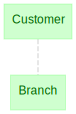

In [129]:
dj.Diagram(schema)

In [130]:
@schema
class HomeBranch(dj. Manual):
   definition = """
   -> Branch
   ---
   branch_nos : tinyint 
   -> Customer

   """


In [131]:
HomeBranch_keys = (Branch * Customer).fetch('KEY')

In [132]:
HomeBranch.insert(
    (dict(random.choice(HomeBranch_keys),
    branch_nos = random.randint(1, 15)) for _ in range(10)), skip_duplicates=True)
    


In [133]:
HomeBranch()

branch_id,branch_nos,customer_id
1109543148,8,93118535568
2448832946,2,93118535568
2868026763,9,87981450401
4238029232,2,47271364549
5645234759,11,29077880180
5804143331,3,41202930119
7642870859,7,53074696810
8417953860,9,77031522187


In [134]:
HomeBranch * Customer * Branch

branch_id,customer_id,branch_nos,first_name,last_name,phone,address
1109543148,93118535568,8,Jeffrey,Tran,88333924662,"483 Howe Islands Apt. 779 Ethanshire, DE 51189"
2448832946,93118535568,2,Jeffrey,Tran,91299380863,"060 Darrell Springs Suite 019 Gonzalesstad, MN 23094"
2868026763,87981450401,9,Julie,Perez,89174445273,"PSC 5501, Box 5408 APO AP 94231"
4238029232,47271364549,2,Jay,Bryant,58388687280,"1528 Alexander Burg West Lori, OR 10063"
5645234759,29077880180,11,Troy,Cantu,17599091387,"889 Kelly Gateway Santiagochester, AL 22951"
5804143331,41202930119,3,Autumn,Soto,65818485874,"PSC 5640, Box 5918 APO AE 65504"
7642870859,53074696810,7,David,Ross,11245597018,"8135 Bowman Heights Suite 012 North Thomasstad, GU 21024"
8417953860,77031522187,9,Kerry,Evans,29241242858,"12649 Porter Dale Suite 699 New Brandonstad, AL 05984"


In [141]:
@schema
class Account(dj. Manual):
   definition = """
   account_num  : int unsigned
   -> Customer
   ---
   account_type : enum("savings", "checking") 
   
   -> Branch

   """

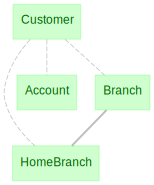

In [142]:
dj.Diagram(schema)

In [118]:
schema.drop()